<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch5_model_evaluation_and_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn==1.0.2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

## 5.1 교차 검증

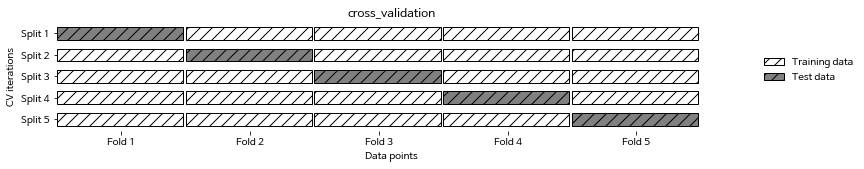

In [2]:
# 데이터를 여러 번 반복해 나누고 여러 모델을 학습

mglearn.plots.plot_cross_validation()

## 5.1.1 scikit-learn의 교차 검증

In [3]:
# iris 데이터 셋을 적용한 Logistic Regression 모델 평가하기

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
# cv 매개변수로 폴드의 수 바꾸기
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
# 교차 검증 평균 점수
print("교차 검증 평균 점수 : {:.2f}" .format(scores.mean()))

교차 검증 평균 점수 : 0.97


In [6]:
# cross_validate : 훈련과 테스트에 걸린 시간을 딕셔너리로 반환
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score = True)
res

{'fit_time': array([0.03658628, 0.04139805, 0.02360201, 0.02532458, 0.02421117]),
 'score_time': array([0.00042367, 0.0004344 , 0.00040698, 0.00061035, 0.00043249]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.036586,0.000424,0.966667,0.966667
1,0.041398,0.000434,1.000000,0.966667
2,0.023602,0.000407,0.933333,0.983333
3,0.025325,0.000610,0.966667,0.983333
4,0.024211,0.000432,1.000000,0.975000


## 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris label :\n", iris.target)

iris label :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


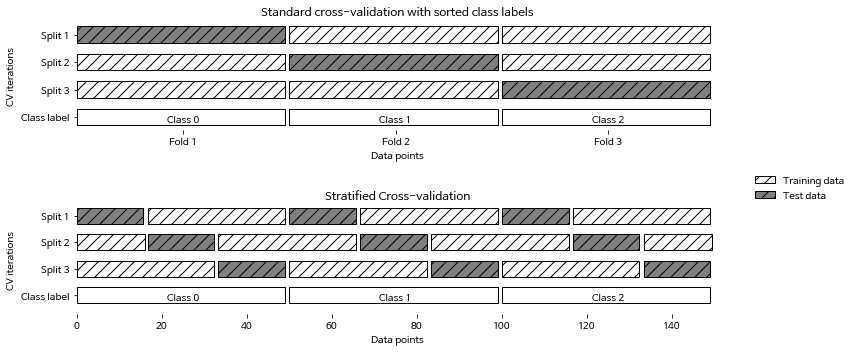

In [9]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
# cv 매개변수에 교차 검증 분할기를 전달 -> 데이터 분할을 제어
# KFold <- 기본 k겹 교차 검증 재현

from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)
print("교차 검증 점수 : ", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :  [1.         1.         0.86666667 0.93333333 0.83333333]


In [11]:
kfold = KFold(n_splits = 3)
print("교차 검증 점수 : ", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :  [0. 0. 0.]


In [12]:
# 데이터를 섞어서 샘플의 순서를 랜덤하게 바꿈 (KFold 의 shuffle = True)
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("교차 검증 점수 : ", cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 :  [0.98 0.96 0.96]


In [13]:
# 폴드 하나에 샘플 하나가 있는 k겹 교차 검증
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("교차 검증 분할 횟수 : ", len(scores))
print("평균 정확도 : {:.2f}" .format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


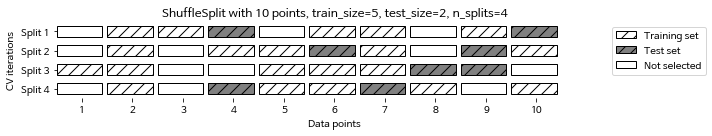

In [14]:
# 임의 분할 교차 검증 : train set, test set, split 횟수를 독립적으로 조정
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수 :\n", scores)

교차 검증 점수 :
 [0.98666667 0.97333333 0.94666667 0.96       0.96       0.94666667
 0.98666667 0.97333333 0.98666667 0.98666667]


In [16]:
# 그룹별 교차 검증 -> train set와 test set에 서로 다른 그룹이 들어가도록 함
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 12, random_state = 0)
groups = [0, 0,0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups = groups, cv = GroupKFold(n_splits = 3))
print("교차 검증 점수 :\n", scores);

교차 검증 점수 :
 [0.75       0.6        0.66666667]


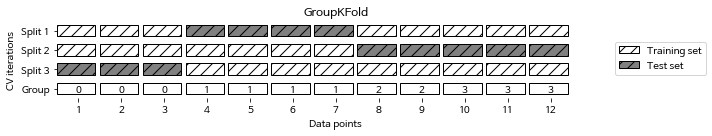

In [17]:
mglearn.plots.plot_group_kfold()

##5.1.4 반복 교차 검증

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state = 42)
scores = cross_val_score(logreg, iris.data, iris.target, cv = rskfold)
print("교차 검증 점수 :\n", scores)
print("교차 검증 평균 점수 : {:.2f}" .format(scores.mean()))

교차 검증 점수 :
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수 : 0.96


## 5.2 그리드 서치

In [21]:
# 가능한 매개변수의 모든 조합을 시도
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("train set size : {}, test set size : {}" .format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if(score > best_score):
            best_score = score
            best_parameters = {'gamma' : gamma, 'C' : C}
print("best score : {:.2f}" .format(best_score))
print("best parameters : ", best_parameters)

train set size : 112, test set size : 38
best score : 0.97
best parameters :  {'gamma': 0.001, 'C': 100}


## 5.2.2 매개변수 과대적합과 검증 세트

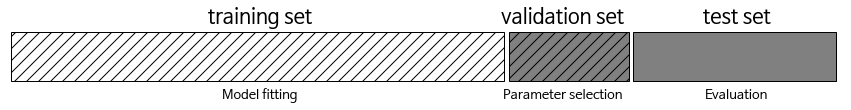

In [24]:
# 평가를 위해서 모델을 만들 때 사용하지 않은 독립된 데이터 세트가 필요
mglearn.plots.plot_threefold_split()

In [27]:
# 데이터 셋을 훈련 세트, 검증 세트, 테스트 세트 3개로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)

print("훈련 세트의 크기 : {}, 검증 세트의 크기 : {}, 테스트 세트의 크기 {}" .format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if(score > best_score):
            best_score = score
            best_parameters = {'gamma' : gamma, 'C' : C}

# 최종 평가에 사용하는 테스트 세트를 분리해 유지해야함!
svm = SVC(**best_parameters).fit(X_trainval, y_trainval)
print("best score : {:.2f}" .format(best_score))
print("best parameters : ", best_parameters)
print("최적 매개변수의 test set에서의 점수 : {:.2f}" .format(svm.score(X_test, y_test)))

훈련 세트의 크기 : 84, 검증 세트의 크기 : 28, 테스트 세트의 크기 38
best score : 0.96
best parameters :  {'gamma': 0.001, 'C': 100}
최적 매개변수의 test set에서의 점수 : 0.97


## 5.2.3 교차 검증을 위한 그리드 서치